<a href="https://colab.research.google.com/github/DomTHK/DLO_Lab/blob/main/DLO_Aufg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

#Aufgaben Praktikum 2
* Implementieren Sie das einfache Netz von Folie 69
* Implementieren Sie auch das zugeh¨orige Training mittels
Gradientenabstieg (Folie 73), gerne mit Mini-Batches
* Nutzen Sie zuf¨allig erzeugte Beispiele zum Trainieren
(y = x1 + x2)
* Fur welche Werte von ¨ η funktioniert das Training
besser / schlechter / nicht?

In [137]:
def create_data(n_values):
  x = np.round(np.random.rand(n_values, 2)*10)
  y = x[:,0] + x[:,1]
  return (x,y)

def one_step(x, y, w, n, i):
  y_= w[0]*x[i,0] + w[1]*x[i,1] 
  L = 0.5*(y_-y[i])**2
  w[0] = w[0] - n*(y_-y[i])*x[i,0]
  w[1] = w[1] - n*(y_-y[i])*x[i,1]
  return w, L

def train_net(n_epochs, x, y, w, n):
  pl = np.zeros((len(y)*n_epochs+1, 2))
  pl[0,0] = w[0]
  pl[0,1] = w[1]
  for j in np.arange(n_epochs):
    for i in np.arange(len(y)):
      w, L = one_step(x, y, w, n, i)
      pl[j*len(y)+i+1,0] = w[0]
      pl[j*len(y)+i+1,1] = w[1]
  return w, pl, L

def plot_lr_result(lr,o):
  if o>0:
    if o%10 == 0:
      plt.figure(figsize=(15,15))
      plt.subplot(5,2,int(o/10))
      plt.scatter(lr[(o-10):o], loss[(o-10):o])
      plt.plot(lr[(o-10):o], loss[(o-10):o])
  

def lr_test(n_epochs, x, y, w, min, max):
  lr = np.linspace(min, max, 100)
  loss = np.zeros((100,1))
  w_old = w + 0.0
  for o in range(100):
    w = w_old + 0.0
    w, dummy, loss[o] = train_net(n_epochs, x, y, w, n=lr[o])
    plot_lr_result(lr, o)
  plt.show()
  return w, pl, loss, lr

def init_w():
  w = np.zeros((2,1))
  w[0] = np.mean(x[:,0])/2
  w[1] = np.mean(x[:,1])/2
  return w

Random initial value of w: 
 [[1.975]
 [2.525]]
Value of w after training: 
 [[0.98635495]
 [1.0219722 ]]


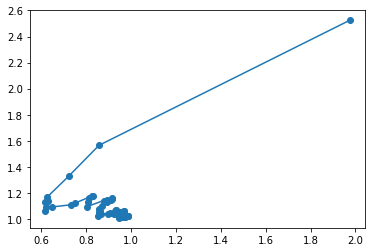

In [96]:
#initialize data
x, y = create_data(20)
w = init_w()
print("Random initial value of w: \n", w)
n = 0.01
n_epochs = 3

#train
w, pl, loss = train_net(n_epochs, x, y, w, n)
print("Value of w after training: \n", w)

#present result
plt.scatter(pl[:,0], pl[:,1])
plt.plot(pl[:,0], pl[:,1])
plt.show()

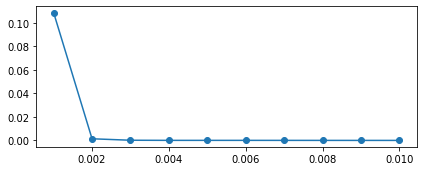

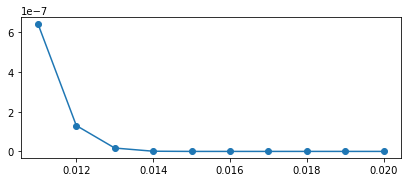

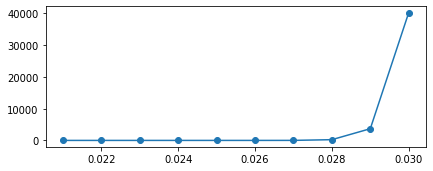

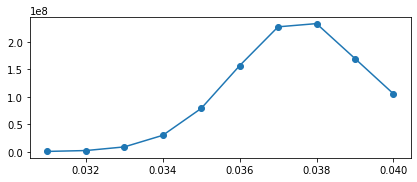

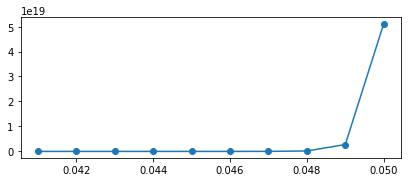

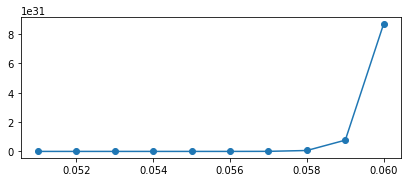

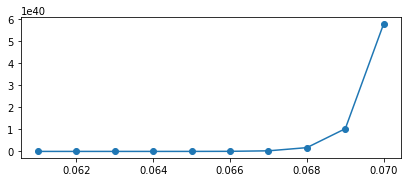

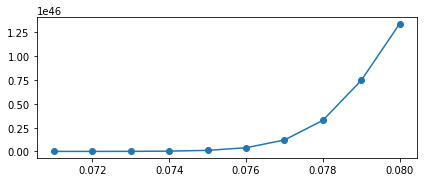

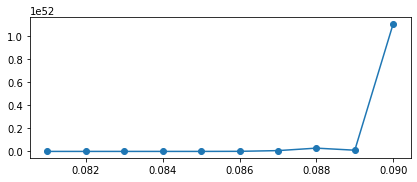

In [138]:
###Only testing learning-rates here###
#initialize data
n_data = 20
x, y = create_data(n_data)
w = init_w()
min = 0.001
max = 0.1
n_epochs = 3
n_plot_points = n_epochs*n_data
n_plot_points_half = int(n_plot_points/2)

#test learning-rate
w, pl, loss, lr = lr_test(n_epochs, x, y, w, min, max)